In [ ]:
# 5 features/inputs
# layer 1 - 128 nodes
# layer 2 - 64 nodes
# layer 3 - 32 nodes

# first layer 
(5 + 1) * 128

768

In [ ]:
# second layer
(128 + 1) * 64

8256

In [ ]:
# third layer
(64 + 1) * 32

2080

In [ ]:
768 + 8256 + 2080

11104

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

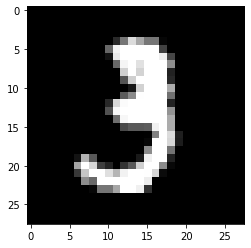

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[10], cmap='gray')

In [ ]:
y_train[10]

3

In [ ]:
# preprocessing

input_dim = 784 # 28 * 28
output_dim = 10
batch_size = 128
nb_epoch = 20

In [ ]:
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
# scale/normalize/MinMaxScaler
X_train /= 255
X_test /= 255

# X_train = X_train * 1.0/255
# X_test = X_test * 1.0/255

In [ ]:
X_train.min()

0.0

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [ ]:
y_train[0]

5

In [ ]:
y_train[4]

9

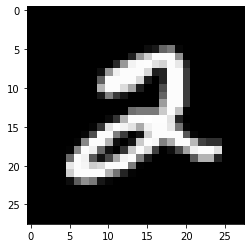

In [ ]:
plt.imshow(X_train[5].reshape(28,28), cmap='gray')

In [ ]:
X_train.shape[1]

784

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# initialize the model
model = Sequential()
# first Dense - number of units/nodes/neurons, input size/shape/dim, activation function
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) # model.add(Dense(64, input_shape=(784,), activation='relu')) 
# second dense
model.add(Dense(64, activation='relu'))
# last layer/output layer - number of classes, activation function
model.add(Dense(10, activation='softmax')) # for binary - sigmoid

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# define the optimization algorithm, loss function, metrics
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 4s 3ms/step - loss: 1.9063 - accuracy: 0.3812 - val_loss: 0.7246 - val_accuracy: 0.8281
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6401 - accuracy: 0.8395 - val_loss: 0.4448 - val_accuracy: 0.8815
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.8801 - val_loss: 0.3653 - val_accuracy: 0.8977
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3753 - accuracy: 0.8947 - val_loss: 0.3295 - val_accuracy: 0.9054
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3360 - accuracy: 0.9037 - val_loss: 0.3059 - val_accuracy: 0.9128
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3127 - accuracy: 0.9094 - val_loss: 0.2912 - val_accuracy: 0.9166
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2958 - accuracy: 0.9147 - val_loss: 0.2763 - val_accuracy: 0.9216
Epoch 

In [ ]:
history

In [ ]:
import pandas as pd

df = pd.DataFrame(history.history)

In [ ]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.462393,0.594867,0.724610,0.8281
1,0.569405,0.853567,0.444825,0.8815
2,0.418752,0.884583,0.365343,0.8977
3,0.362754,0.898000,0.329509,0.9054
4,0.331483,0.905533,0.305920,0.9128


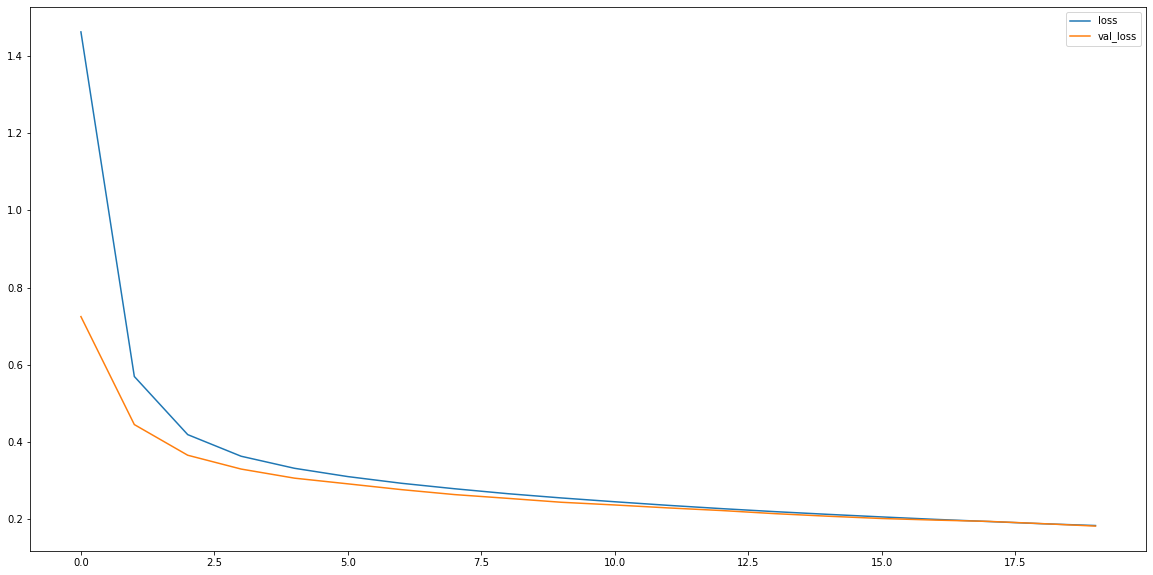

In [ ]:
df[['loss', 'val_loss']].plot(figsize=(20,10))

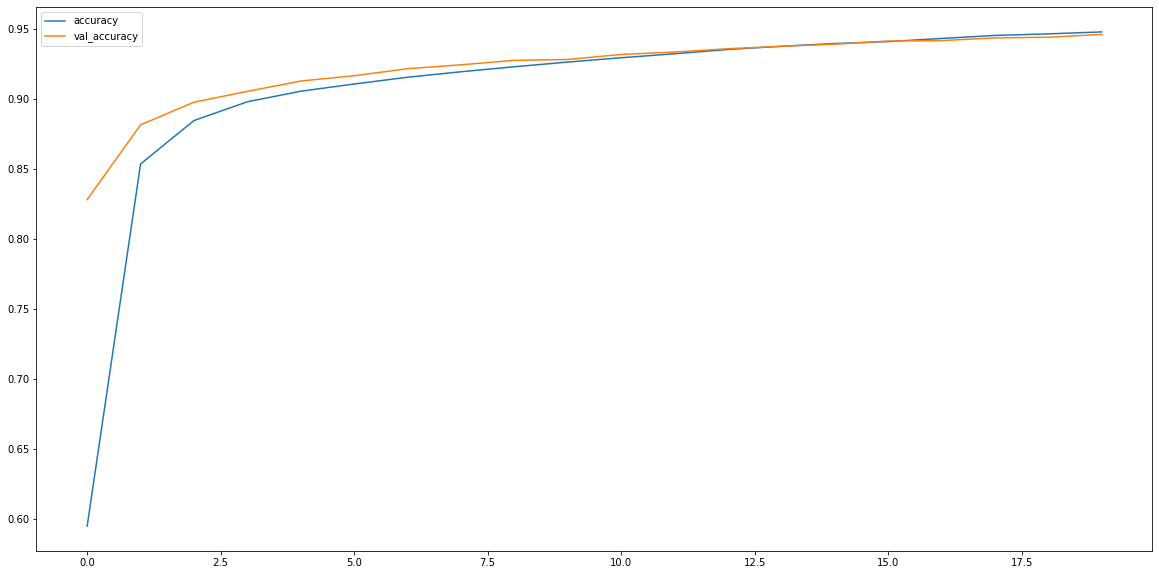

In [ ]:
df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))

In [ ]:
# predicting an array of probabilities
model.predict(X_test)[0]

array([1.4348411e-04, 4.3210284e-07, 1.3437942e-03, 1.1126410e-03,
       8.4557634e-08, 4.0672479e-05, 4.4510698e-10, 9.9654299e-01,
       3.1512154e-05, 7.8435463e-04], dtype=float32)

In [ ]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

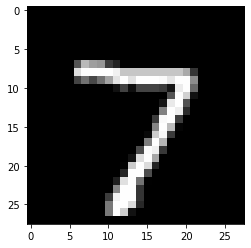

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [ ]:
model.predict_classes(X_test)[0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


7

In [ ]:
import numpy as np
# predict the class
predictions = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
df_preds = pd.DataFrame({'true': y_test, 'pred': predictions})
df_preds.head()

,true,pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1817 - accuracy: 0.9461


[0.18171991407871246, 0.9460999965667725]

In [ ]:
df_preds[df_preds['true'] != df_preds['pred']]

,true,pred
8,5,6
33,4,6
124,7,4
149,2,9
193,9,4
...,...,...
9970,5,3
9975,3,2
9980,2,3
9982,5,6


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_preds['true'], df_preds['pred'])

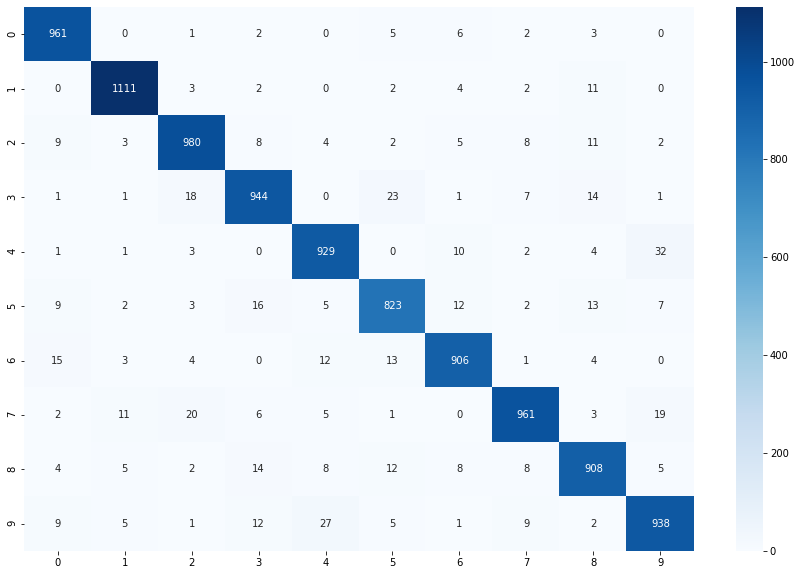

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')